/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Accuracy wrt K-fold [0.956155878801023, 0.8837943756906169, 0.9237476397497391, 0.7282243508623083, nan]


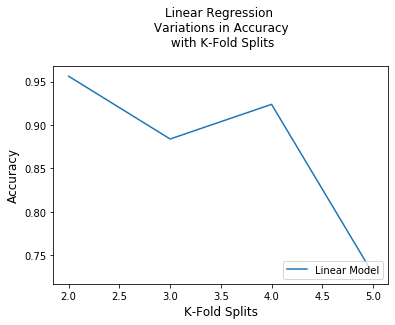

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import model_selection
%matplotlib inline 
import matplotlib.pyplot as plt

class Linear_Regression():
    def __init__(self):
        self.split = [2,3,4,5,10]
        
    def dataset_split(self):
        df = pd.read_csv("sample.csv")
        X =df[['areainsqft']][:].values.reshape(17, 1)
        y =  df[['rent']][:].values.reshape(17, 1)
        return X,y
    
    def model_creation(self, X, y):
        acc = []
        for j in self.split:
            kfold = model_selection.KFold(n_splits=j)
            model = linear_model.LinearRegression()
            results = model_selection.cross_val_score(model, X, y, cv=kfold)
            accuracy_score = results.mean()
            acc.append(accuracy_score)
        return acc
    
    def graph(self, acc_score):
        
        plt.plot(self.split, acc_score)
        plt.title("Linear Regression \n Variations in Accuracy \n with K-Fold Splits", pad=20)
        plt.ylabel("Accuracy", fontsize = "large")
        plt.xlabel('K-Fold Splits', fontsize = "large")
        plt.legend(["Linear Model"], loc='lower right')
        plt.show()

    
linear = Linear_Regression()
X,y = linear.dataset_split()
accuracy = linear.model_creation(X,y)
print("Accuracy wrt K-fold", accuracy)

linear.graph(accuracy)